# Paso 1 (Cargar Datos)

In [1]:
# NOTA
# Muchos de mis comentarios estan en el codigo con #
# Muchos otros los mando directamente en el print, al analizar algun aspecto de la grafica o de las tablas.
# Los bloques markdown los ocupe para los titulos y las conclusiones de Hipotesis y Conclusiones finales.

# Librerias:
import pandas as pd
import numpy as np

import math as mt

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
%config InlineBackend.figure_format = 'retina'
# load the tips dataset present by default in seaborn
tips = sns.load_dataset('tips') 
sns.set_style('darkgrid')

from scipy import stats as st

In [2]:
df = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 6/games.csv')
print(df.info())
display(df.describe())
display(df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


# Paso 2 (Limpieza)

In [3]:
# Se itera sobre los titulos de columna para corregirlos:
nuevos_titulos = []
for nombre in df.columns:
    titulo = nombre.strip().lower()
    titulo = titulo.replace(' ','_')
    nuevos_titulos.append(titulo)
df.columns = nuevos_titulos
display(df.head(1))

# Aqui relleno valores ausentes en la columna nombre por 'Unknown'
df['name'] = df['name'].fillna('Unknown')
print(f'Valores ausentes para la columna "name": {df["name"].isna().sum()}')

# Aqui para los generos NaN los cambie por 'Unknown'
df['genre'] = df['genre'].fillna('Unknown')
print()
print('Generos unicos despues de limpieza:')
print(sorted(df['genre'].unique(), reverse = True))

# Aqui cambio el tipo de dato para la columna 'year_of_release' por int64.
# Tambien cambie los NaN por el numero 0 para determinar que el año es desconocido, y mas adelante poder agrupar.
df['year_of_release'] = df['year_of_release'].fillna(0.0)
df['year_of_release'] = df['year_of_release'].astype('int64')
print()
print('Fechas ordenadas de mayor a menor:')
print()
print(sorted(df['year_of_release'].unique().tolist(),reverse=True))

# Aqui cambie los NaN por un '-1' para indicar sin calificacion y para poder agrupar mas adelante
df['critic_score'] = df['critic_score'].fillna(-1)
print()
print('Puntajes criticas con la adicion del -1 para aquellos no calificados:')
print()
print(sorted(df['critic_score'].unique().tolist(), reverse = True))

# Aqui cambiare el tipo de dato para la columna 'user_score'
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')
# Aqui cambiare NaN por '-1' para indicar sin calificacion y para poder agrupar mas adelante
df['user_score'] = df['user_score'].fillna(-1)
print()
print('Calificacion de usuario con la adicion de -1 para aquellos no calificados:')
print()
print(sorted(df['user_score'].unique().tolist(), reverse = True))

# Aqui rellene valores vacios en la columna 'rating' con el string 'Unknown'
df['rating'] = df['rating'].fillna('Unknown')
print()
print('Rating Oficial corregido para valores desconocidos:')
print(sorted(df['rating'].unique(), reverse = True))

print()
print(f'Total de valores ausentes en todo el DataFrame:')
print(df.isnull().sum())

# Finalmente creo una nueva columna con la suma de las ventas totales de todas las regiones para cada juego:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head(1))

df.to_csv('df_games_limpio.csv',index=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Valores ausentes para la columna "name": 0

Generos unicos despues de limpieza:
['Unknown', 'Strategy', 'Sports', 'Simulation', 'Shooter', 'Role-Playing', 'Racing', 'Puzzle', 'Platform', 'Misc', 'Fighting', 'Adventure', 'Action']

Fechas ordenadas de mayor a menor:

[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 0]

Puntajes criticas con la adicion del -1 para aquellos no calificados:

[98.0, 97.0, 96.0, 95.0, 94.0, 93.0, 92.0, 91.0, 90.0, 89.0, 88.0, 87.0, 86.0, 85.0, 84.0, 83.0, 82.0, 81.0, 80.0, 79.0, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 70.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0, 61.0, 60.0, 59.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


# PASO 3 (Analizar datos a manera general)

In [4]:
# *** ANALISIS
# Juegos lanzados por año
juegos_por_año = df.groupby(by = 'year_of_release')['name'].count().reset_index()
print(juegos_por_año.sort_values(by = 'year_of_release', ascending = False).head(15))
# Clara tendencia de aumento por año hasta el 2010, en adelante las ventas comenzaron a decaer:

    year_of_release  name
37             2016   502
36             2015   606
35             2014   581
34             2013   544
33             2012   653
32             2011  1136
31             2010  1255
30             2009  1426
29             2008  1427
28             2007  1197
27             2006  1006
26             2005   939
25             2004   762
24             2003   775
23             2002   829


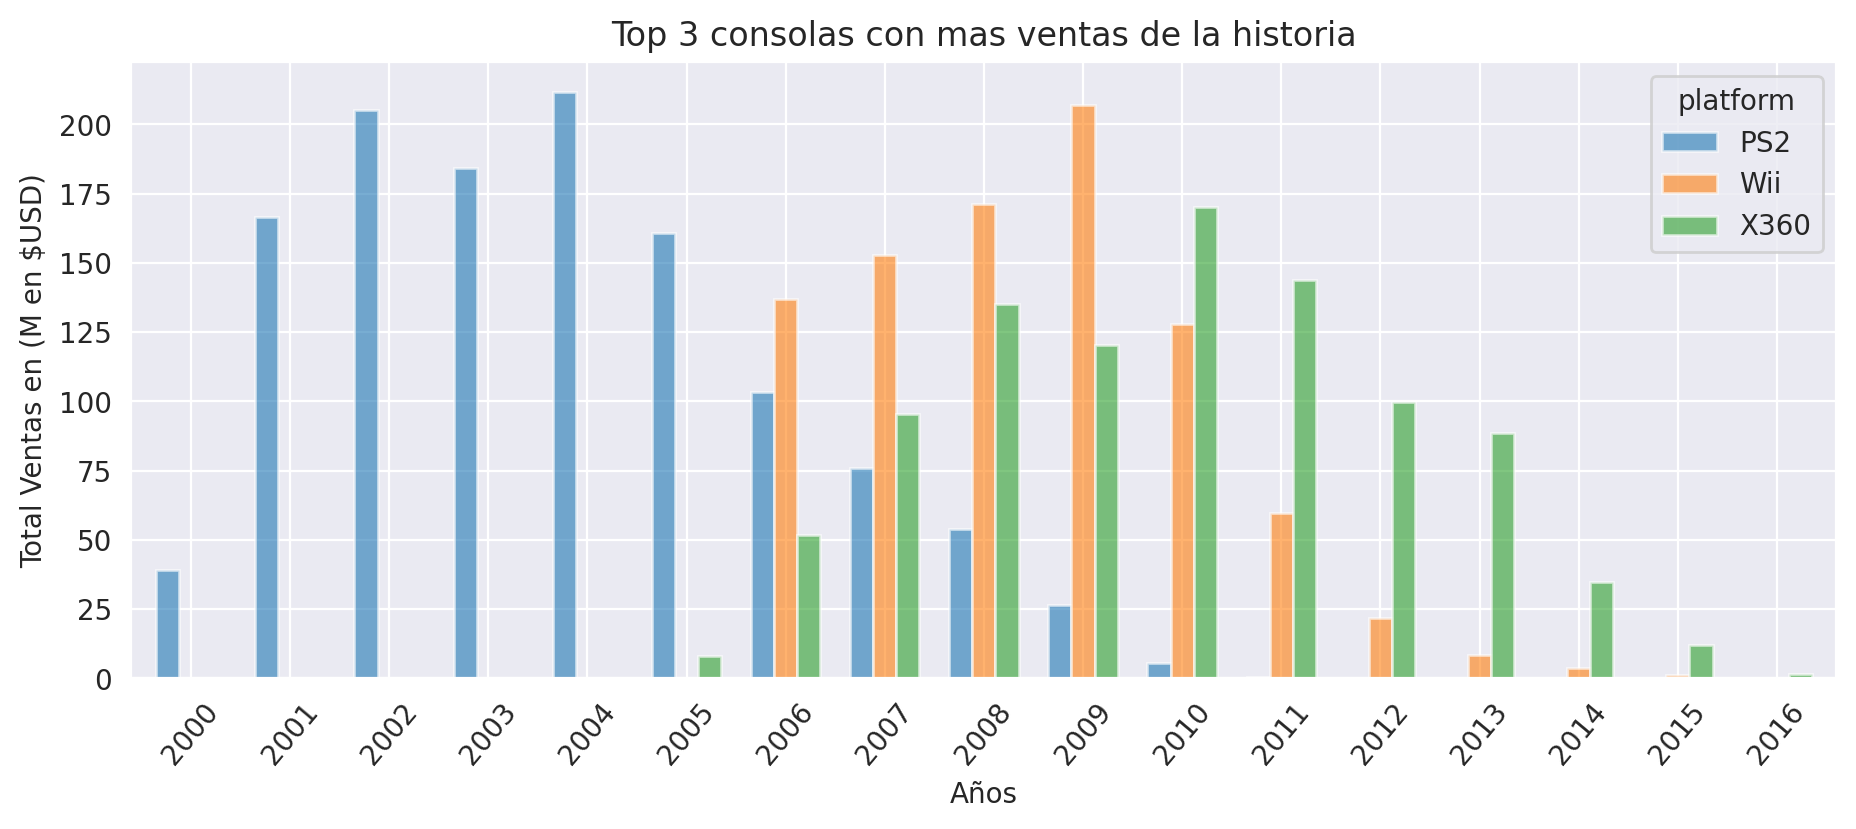

Como podemos ver en la grafica:
Podriamos decir que en la actualidad una consola moderna tarda entre 3 a 4 años en ser popular
Aqui tambien podemos ver que del año 2002 al 2010 la popularidad de las consolas se mantuvo
Hipotesis nula: La popularidad de ventas entre las consolas top (PS2) y (Wii) se mantiene igual
El valor-p entre PS2 y Wii es: 0.457162736562267
No podemos rechazar hipotesis nula


In [5]:
# Analisis de ventas para las plataformas
ventas_plataforma = df.groupby(by = ['year_of_release', 'platform'])['total_sales'].sum().reset_index()
ventas_plataforma = ventas_plataforma.sort_values(by = 'total_sales', ascending = False)
#print(ventas_plataforma.head(6))

# Filtrando las 3 plataformas con mas ventas
def filtro_plat(tabla,columna1, columna2, consola):
    filtro1 = tabla[(tabla[columna1] > 0) & (tabla[columna2] == consola)]
    return filtro1

ps2 = filtro_plat(df, 'year_of_release', 'platform', 'PS2')
wii = filtro_plat(df, 'year_of_release', 'platform', 'Wii')
x360 = filtro_plat(df, 'year_of_release', 'platform', 'X360')

union = pd.concat([ps2,wii,x360], axis = 'rows')

# Distribucion por año del top 3 ventas por plataforma ocupando una tabla dinamica
pivot_platforms = union.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum',
    fill_value = 0
)
# Grafica
pivot_platforms.plot(
    kind = 'bar',
    figsize = [11,4],
    rot = 50,
    width = 0.7,
    alpha = 0.6
)
plt.xlabel('Años')
plt.ylabel('Total Ventas en (M en $USD)')
plt.title('Top 3 consolas con mas ventas de la historia')

plt.show()

print('Como podemos ver en la grafica:')
print('Podriamos decir que en la actualidad una consola moderna tarda entre 3 a 4 años en ser popular')
print('Aqui tambien podemos ver que del año 2002 al 2010 la popularidad de las consolas se mantuvo')
print('Hipotesis nula: La popularidad de ventas entre las consolas top (PS2) y (Wii) se mantiene igual')

# A simple vista parece una grafica normal, por tanto probare la hipotesis con un ttest_ind de (medias)
alpha1 = 0.05
resultado1 = st.ttest_ind(pivot_platforms['PS2'], pivot_platforms['Wii'])
print(f'El valor-p entre PS2 y Wii es: {resultado1.pvalue}')
if resultado1.pvalue < alpha1:
    print('Rechazamos hipotesis nula. Si existe diferencia')
else:
    print('No podemos rechazar hipotesis nula')

,year_of_release,platform,total_sales
77,1998,PS,169.49
84,1999,PS,144.53
70,1997,PS,136.17
64,1996,PS,94.70
20,1989,GB,64.97
82,1999,N64,57.87
9,1985,NES,53.44
6,1984,NES,50.08


Las consolas que solian ser populares antes del 2000 son: ['PS' 'GB' 'N64' 'NES']
Buenos años para Nintendo 3/4 consolas a lo largo de estas fechas.
['NES' 'GB' 'N64' 'PS']


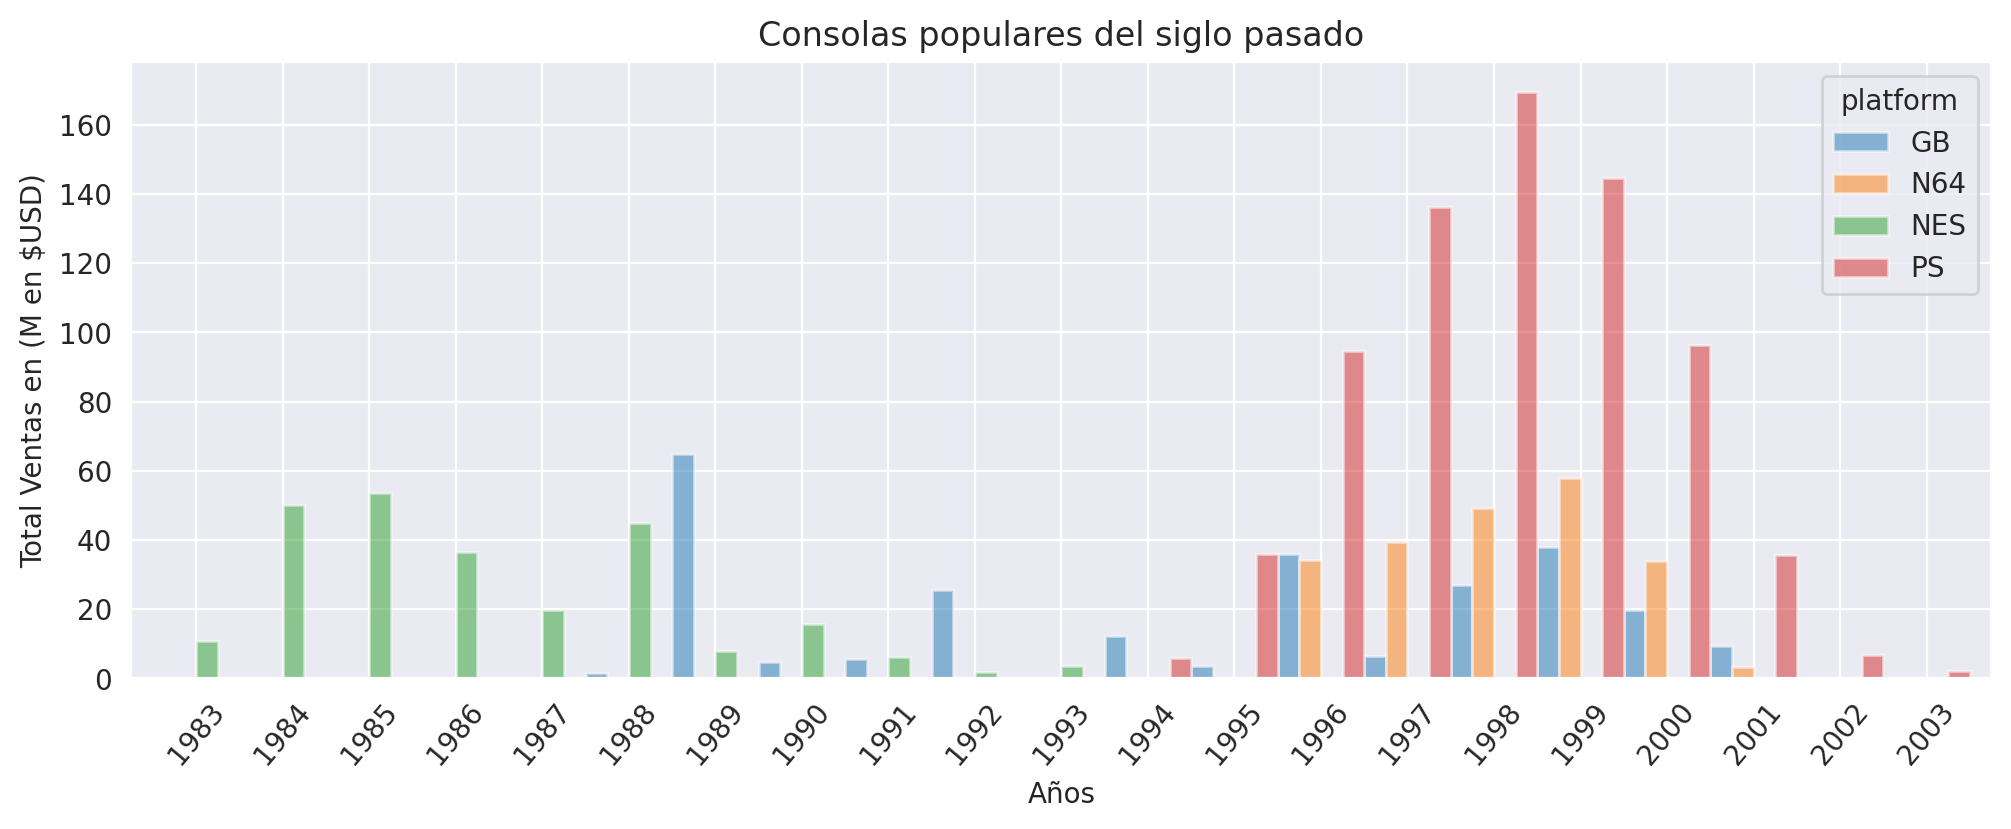

Las consolas previas a 1994 tardaron una decada en desaparecer
Las consolas posteriores a 1994 tardaron 4 a 5 años en desaparecer, lo que indica un mercado mas acelerado, posiblemente por el aumento de competencia de otros manufactureros de consolas.


In [6]:
#  *** ANALISIS

# Plataformas que solian ser populares
# 1. Primero establesco la modernidad a partir del año '2000', asi aquellas plataformas que no aparecen
# en los años recientes podriamos decir que ya no tienen ventas
df_1999 = df[(df['year_of_release'] < 2000) & (df['year_of_release'] > 0)]
grupo_1999 = df_1999.groupby(by = ['year_of_release','platform'])['total_sales'].sum().reset_index()
grupo_1999 = grupo_1999.sort_values(by = 'total_sales', ascending = False)

# 2. Viendo que las ventas mas altas se encuentran entre 60M $USD y 170M $USD
# Para plataformas que existieron en un rango de 20 años (1980 - 1999)
# Ocupare los 50M $USD como criterio para determinar el factor 'popular'
grupo_1999 = grupo_1999[grupo_1999['total_sales'] > 50.0]
display(grupo_1999.sort_values(by = 'total_sales', ascending = False))

# 3. Con lo anterior podemos determinar que las consolas populares (con ventas de mas de 50M $USD) 
# y de años previos a (1999) son: PS, N64, GB, NES
consolas_retro_populares = grupo_1999['platform'].unique()
print(f'Las consolas que solian ser populares antes del 2000 son: {consolas_retro_populares}')
print('Buenos años para Nintendo 3/4 consolas a lo largo de estas fechas.')

# Mostrando la distribucion de ventas por anho de las consolas que solian ser populares:
filtro_retro = df[
    (df['platform'] == 'PS') & (df['year_of_release'] > 0) |
    (df['platform'] == 'GB') & (df['year_of_release'] > 0) |
    (df['platform'] == 'N64') & (df['year_of_release'] > 0) |
    (df['platform'] == 'NES') & (df['year_of_release'] > 0)
    ]

print(filtro_retro['platform'].unique())
pivot_retro = filtro_retro.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
)
pivot_retro.plot(
    kind = 'bar',
    alpha = 0.5,
    figsize = [12,4],
    width = 1,
    rot = 50
)

plt.title('Consolas populares del siglo pasado')
plt.xlabel('Años')
plt.ylabel('Total Ventas en (M en $USD)')
plt.show()

print('Las consolas previas a 1994 tardaron una decada en desaparecer')
print('Las consolas posteriores a 1994 tardaron 4 a 5 años en desaparecer, lo que indica un mercado mas acelerado, \
posiblemente por el aumento de competencia de otros manufactureros de consolas.')

['Wii' 'DS' 'X360' 'PS3' 'PS4' '3DS' 'PC' 'XOne' 'WiiU' 'PS2' 'PSP']


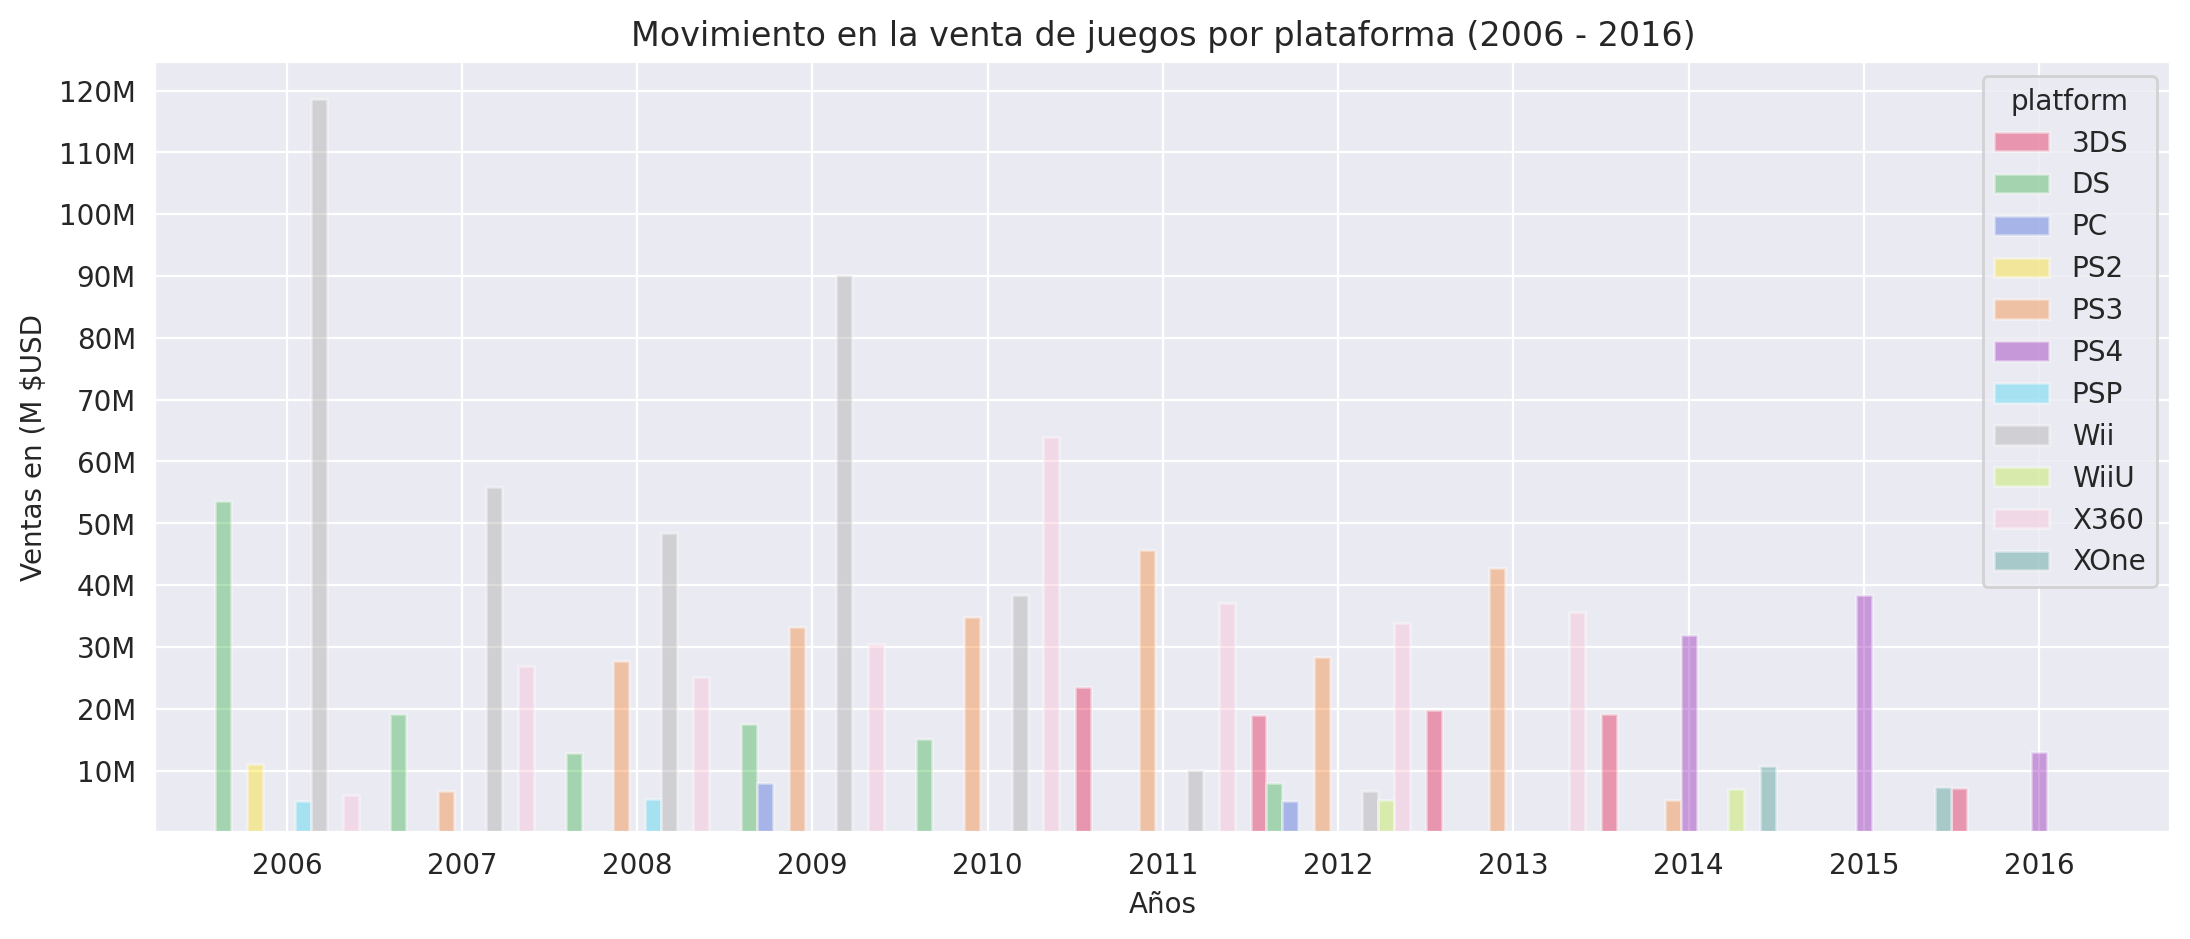

Viendo las graficas y sabiendo que las plataformas modernas alcanzan su maxima de popularidad en 3 a 4 años
Las plataformas potencialmente rentables son: (PS4, XOne y 3DS). La ultima aun con 1 o 2 años mas de rentabilidad

Hipotesis nula: Las ventas de juegos de PS4 son mayor o igual a las ventas de PS3
Dado que tengo datos completos para PS3 y PS4 pondre a pruba estas plataformas
El valor-p: 0.03994300392687993
Rechazamos hipotesis nula. Las ventas de PS4 son menores que las que tuvo PS3

De igual manera veamos si hay disminucion de ventas entre X360 y XOne
Hipotesis nula: Las ventas de XOne son mayores o iguales a las de X360
El valor-p: 0.0010460041669912152
Rechazamos hipotesis nula. Las ventas de XOne son menores que las que tuvo X360

Conclusion: Las consolas actuales figuran en un periodo corto y aun podria haber un crecimiento para 2017
1. Al probar hipotesis vemos que las opciones modernas con mas ventas aun no superan a sus antecesores
2. La mejor opcion en este momento sera 

In [7]:
# *** ANALISIS

# Plataformas mas rentables con un enfoque hacia el 2017
# 1. Filtro para obtener datos de consolas que abarquen los periodos del 2006 al 2016. (Una decada) Tomando como referencia la primera grafica y el
# comportamiento de plataformas modernas populares. Tambien ocupe 
df_2006s_consolas = df[(df['year_of_release'] >= 2006) & (df['total_sales'] > 5)]
print(df_2006s_consolas['platform'].unique())

pivot_2006s_consolas = df_2006s_consolas.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum',
    fill_value = 0
)

eje_y = [10,20,30,40,50,60,70,80,90,100,110,120]
eje_y_label = [f'{val:.0f}M' for val in eje_y]
colores_hex_distintos = [
    '#E6194B',  # Rojo
    '#3CB44B',  # Verde Brillante
    '#4363D8',  # Azul Intenso
    '#FFE119',  # Amarillo Brillante
    '#F58231',  # Naranja
    '#911EB4',  # Púrpura
    '#42D4F4',  # Cian Claro
    '#A9A9A9',  # Gris Oscuro
    '#BFEF45',  # Verde Lima Claro
    '#FABED4',  # Rosa Pastel
    '#469990'   # Turquesa Oscuro
]
pivot_2006s_consolas.plot(
    kind = 'bar',
    figsize = [13,5],
    alpha = 0.4,
    width = 1,
    rot = 0,
    color = colores_hex_distintos
)

plt.yticks(eje_y, eje_y_label)

plt.xlabel('Años')
plt.ylabel('Ventas en (M $USD')
plt.title('Movimiento en la venta de juegos por plataforma (2006 - 2016)')
plt.show()

print('Viendo las graficas y sabiendo que las plataformas modernas alcanzan su maxima de popularidad en 3 a 4 años')
print('Las plataformas potencialmente rentables son: (PS4, XOne y 3DS). La ultima aun con 1 o 2 años mas de rentabilidad')
print()
print('Hipotesis nula: Las ventas de juegos de PS4 son mayor o igual a las ventas de PS3')
print('Dado que tengo datos completos para PS3 y PS4 pondre a pruba estas plataformas')
alpha2 = 0.05
resultado2 = st.ttest_ind(pivot_2006s_consolas['PS4'], pivot_2006s_consolas['PS3'], alternative='less')
print(f'El valor-p: {resultado2.pvalue}')
if resultado2.pvalue < alpha2:
    print('Rechazamos hipotesis nula. Las ventas de PS4 son menores que las que tuvo PS3')
else:
    print('No podemos rechazar hipotesis nula')

print()
alpha3 = 0.05
print('De igual manera veamos si hay disminucion de ventas entre X360 y XOne')
print('Hipotesis nula: Las ventas de XOne son mayores o iguales a las de X360')
resultado3 = st.ttest_ind(pivot_2006s_consolas['XOne'], pivot_2006s_consolas['X360'],alternative = 'less')
print(f'El valor-p: {resultado3.pvalue}')
if resultado3.pvalue < alpha3:
    print('Rechazamos hipotesis nula. Las ventas de XOne son menores que las que tuvo X360')
else:
    print('No podemos rechazar hipotesis nula')

print()
print('Conclusion: Las consolas actuales figuran en un periodo corto y aun podria haber un crecimiento para 2017')
print('1. Al probar hipotesis vemos que las opciones modernas con mas ventas aun no superan a sus antecesores')
print('2. La mejor opcion en este momento sera la PS4 y en donde sugiero invertir publicidad')

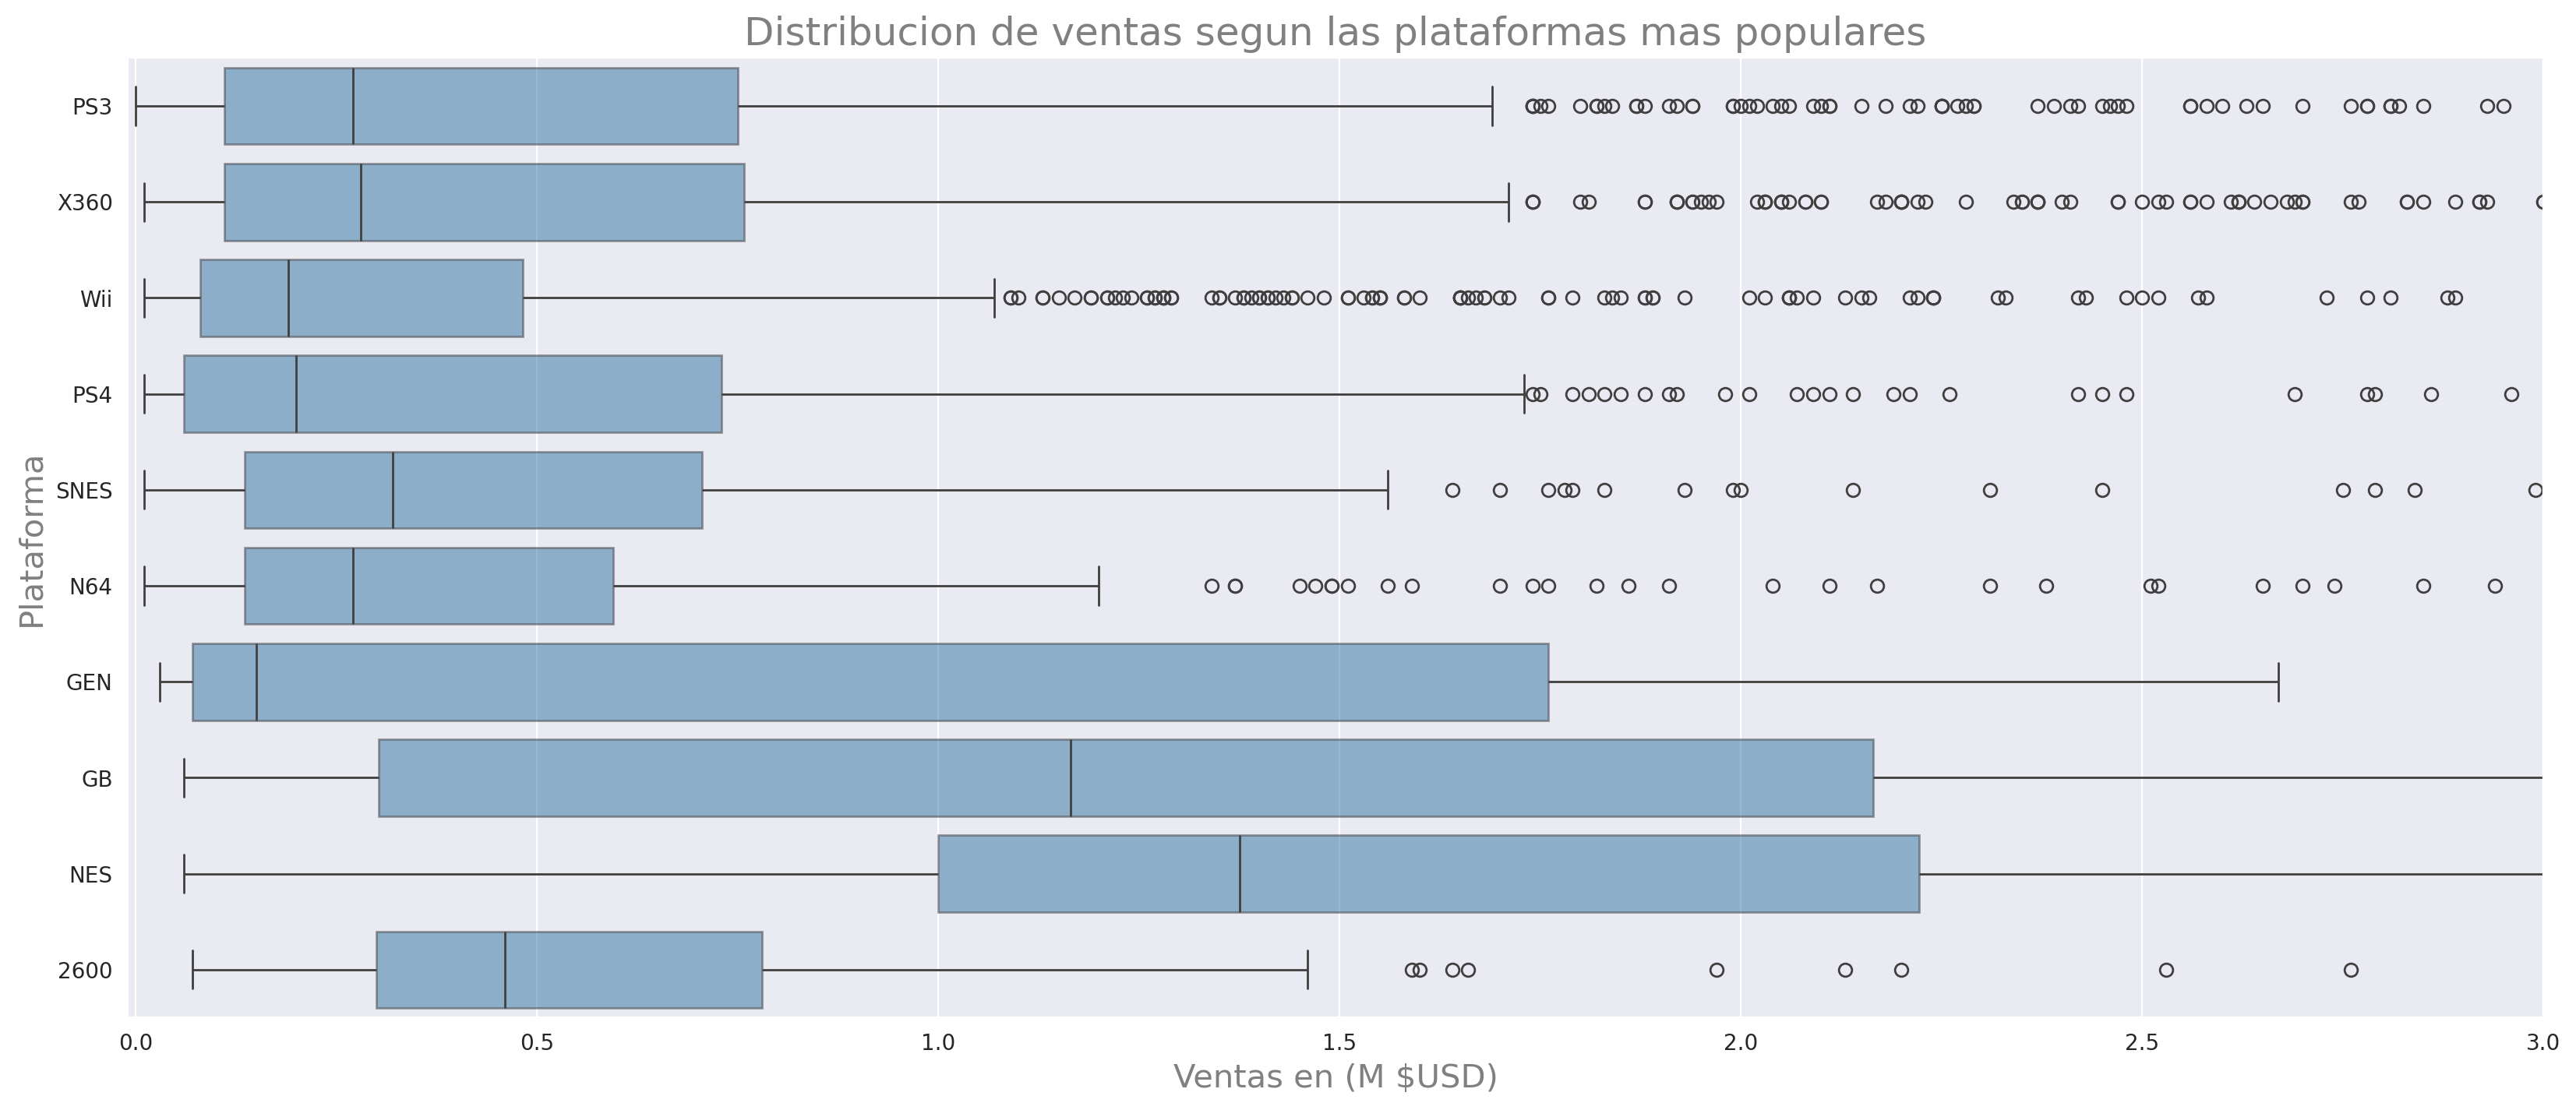

Definitivamente hay diferencias en las ventas, hay gran cantidad de valores atipicos para todas las consolas
Las ventas promedio no superan los 0.6 Millones $USD en su mayoria
Y la mediana para la mayoria de las consolas se encuentra por debajo de los 0.5 Millones $USD


In [8]:
# *** Analisis

# Grafico de caja y bigote para ventas de juego por plataforma

# Note que al hacer cajas con tantas concolas algunas con medias demasiado bajas, (casi cero), todo se amontono, decidi seleccionar el top 10 medias de venta 
# de consolas para una mejor visualizacion:
# print(df.groupby('platform')['total_sales'].mean().sort_values(ascending = False).head(10))
lista = ['GB','NES','GEN','SNES','PS4','X360','2600','PS3','Wii','N64']
df_bigote1 = df[df['platform'].isin(lista)]
df_bigote1 = df_bigote1.sort_values(by = 'total_sales',ascending = True)
plt.figure(figsize = [20,8])
sns.boxplot(x = 'total_sales', y = 'platform', data = df_bigote1, boxprops=dict(alpha = 0.5))
plt.xlim([-0.01,3])

plt.xlabel('Ventas en (M $USD)',fontsize=15,color='gray')
plt.ylabel('Plataforma',fontsize=15,color='gray')
plt.title('Distribucion de ventas segun las plataformas mas populares',fontsize=18,color='gray')
plt.show()
print('Definitivamente hay diferencias en las ventas, hay gran cantidad de valores atipicos para todas las consolas')
print('Las ventas promedio no superan los 0.6 Millones $USD en su mayoria')
print('Y la mediana para la mayoria de las consolas se encuentra por debajo de los 0.5 Millones $USD')

,platform,critic_score,user_score,total_sales
0,Wii,76.0,8.0,82.54
2,Wii,82.0,8.3,35.52


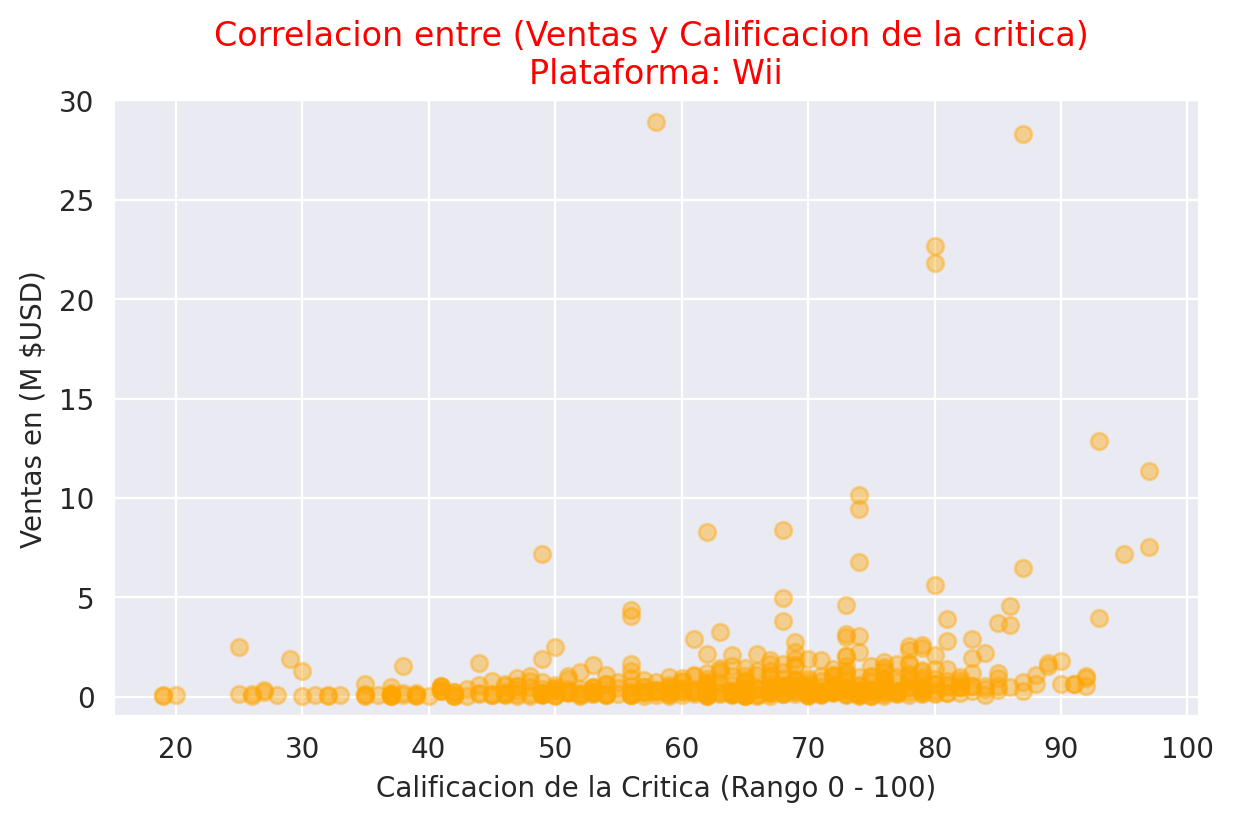

Coeficiente de correlacion critica/ventas: 0.17
La correlacion es positiva pero insignificante



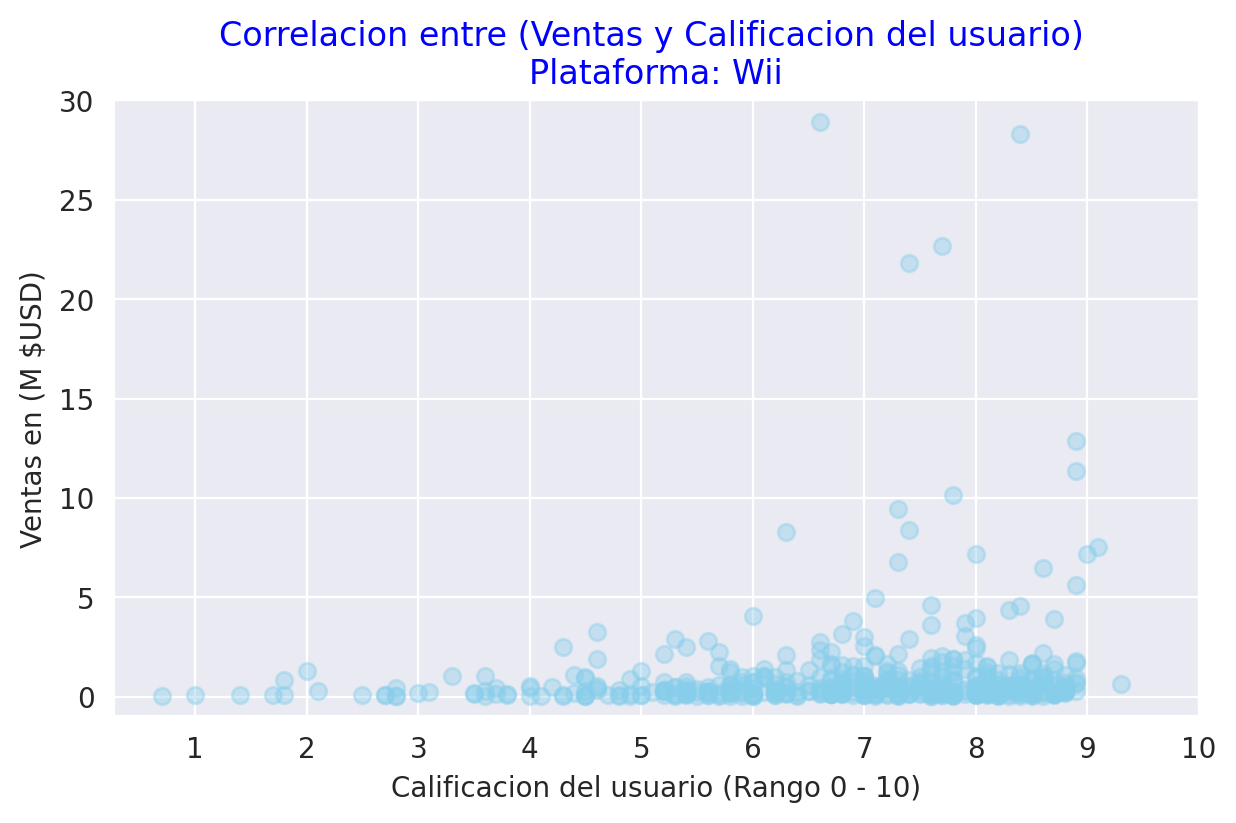

Coeficiente de correlacion user_crit/ventas: 0.11
La correlacion es positiva pero insignificante


In [9]:
# ANALISIS

# Encontrar si existe una correlacion entre ventas y reseñas 
# 1. Primero creare un data frame que contenga unicamente los datos de venta de la consola Wii y las reseñas de usuarios y criticos.
# Excluyendo los valos -1 de ambas criticas porque significa que no fueron calificadas
filtro_wii = df[(df['platform'] == 'Wii') & ~(df['critic_score'] == -1) & ~(df['user_score'] == -1)]
wii_lista = ['platform', 'critic_score', 'user_score','total_sales']
df_wii = filtro_wii[wii_lista]
display(df_wii.head(2))

# 2. Relacion entre ventas de la Wii y la calificacion de la critica:
plt.figure(figsize = [7,4])
plt.scatter(x = df_wii['critic_score'], y = df_wii['total_sales'], alpha = 0.4, color = 'orange')
plt.xlabel('Calificacion de la Critica (Rango 0 - 100)')
plt.ylabel('Ventas en (M $USD)')
plt.title('Correlacion entre (Ventas y Calificacion de la critica) \nPlataforma: Wii',color='red')
plt.ylim([-1,30])

plt.show()
correlacion_critic = df_wii['critic_score'].corr(df_wii['total_sales'])
print(f'Coeficiente de correlacion critica/ventas: {correlacion_critic:.2f}')
print('La correlacion es positiva pero insignificante')
print()

# 3. Relacion entre ventas de la Wii y la calificacion de la critica:
ticks_x = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = [7,4])
plt.scatter(x = df_wii['user_score'], y = df_wii['total_sales'], alpha = 0.4, color = 'skyblue')
plt.xticks(ticks_x)
plt.xlabel('Calificacion del usuario (Rango 0 - 10)')
plt.ylabel('Ventas en (M $USD)')
plt.title('Correlacion entre (Ventas y Calificacion del usuario) \nPlataforma: Wii',color='blue')
plt.ylim([-1,30])

plt.show()
correlacion_user = df_wii['user_score'].corr(df_wii['total_sales'])
print(f'Coeficiente de correlacion user_crit/ventas: {correlacion_user:.2f}')
print('La correlacion es positiva pero insignificante')


* Sorprendentemente la calificacion dada por critica o por usuarios en ambos casos no presentan una correlacion significante.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14658,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.0,0.00,70.0,6.3,T,0.02
9507,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.0,0.01,65.0,-1.0,T,0.13
4475,007: Quantum of Solace,PS2,2008,Action,0.17,0.00,0.0,0.26,-1.0,-1.0,Unknown,0.43


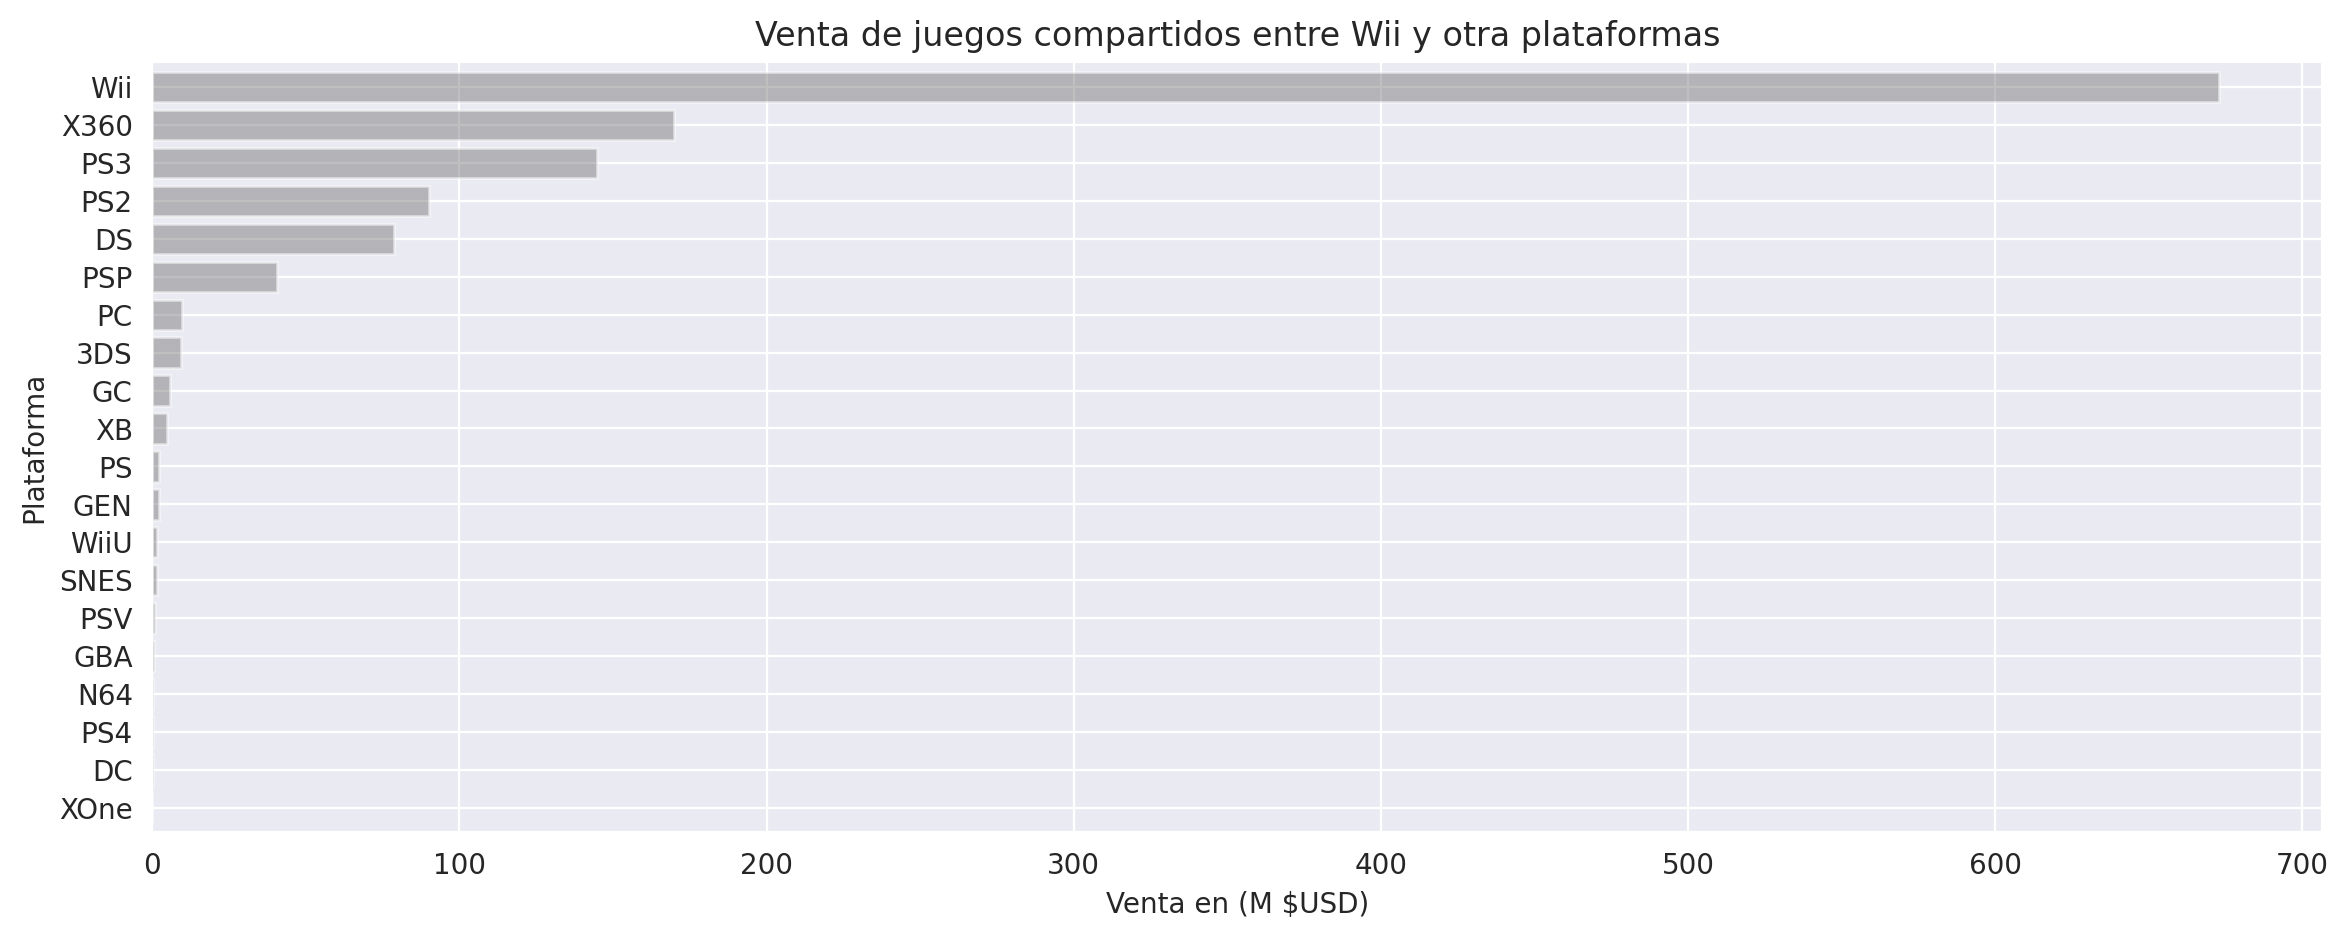

Segun la grafica:
La consola Wii supera por mucho en ventas a las plataformas que comparten titulos con ella (Alrededor de 400M $USD de diferencia).
Tambien considero que sus altas ventas se puede deber a titulos exclusivos de la Wii.
Sin duda una consola popular como lo demostraban las primeras graficas


In [10]:
# ANALISIS 

# Ventas de juegos analizados para la plataforma Wii en otras plataformas

# 1. Encunetro los juegos analizados anteriormente
lista_names = filtro_wii['name'].unique()
plat_con_mismos_juegos = df[df['name'].isin(lista_names)]
display(plat_con_mismos_juegos.sort_values(by = 'name').head(3))

# 2. Agrupo por plataformas
graf = plat_con_mismos_juegos.groupby('platform')['total_sales'].sum()
graf = graf.sort_values()
#print(graf)
plt.figure(figsize = [14,5])
graf.plot(
    kind = 'barh',
    alpha = 0.5,
    width = 0.8,
    color = 'gray'
)

plt.title('Venta de juegos compartidos entre Wii y otra plataformas')
plt.xlabel('Venta en (M $USD)')
plt.ylabel('Plataforma')
plt.show()
print('Segun la grafica:')
print('La consola Wii supera por mucho en ventas a las plataformas que comparten titulos con ella (Alrededor de 400M $USD de diferencia).')
print('Tambien considero que sus altas ventas se puede deber a titulos exclusivos de la Wii.')
print('Sin duda una consola popular como lo demostraban las primeras graficas')

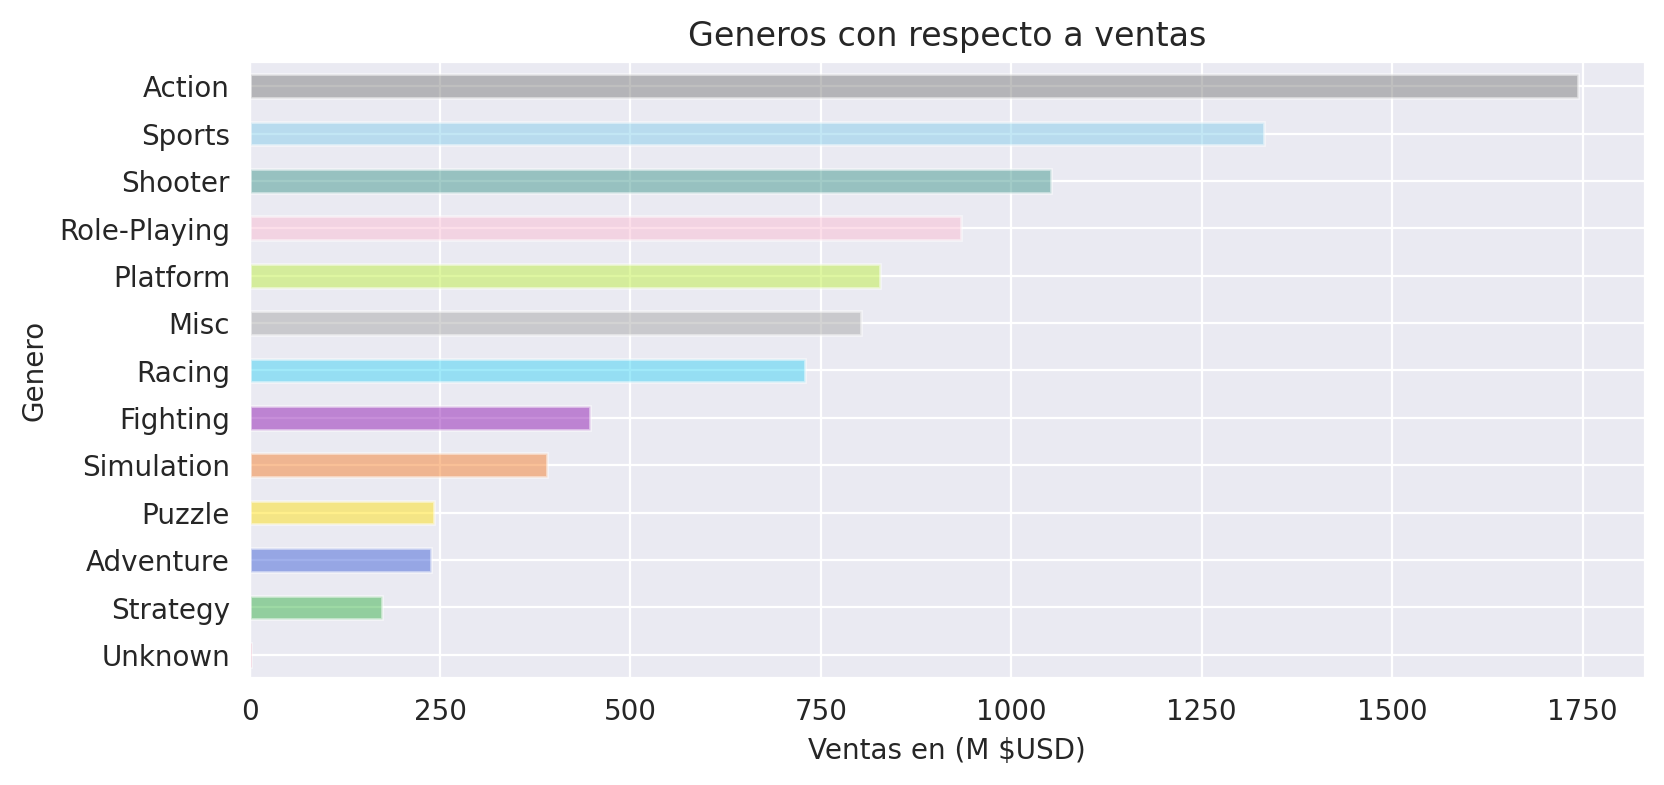

Segun la grafica:
Los generos con mas ventas son: (Action, Sports, Shooter)
Los generos con menos ventas son: (Strategy, Adventure, Puzzle)
Mas adelante en la seccion de Hipotesis se evalua la similitud entre medias de Sports y Action


In [11]:
# ANALISIS 

# Distribucion de ventas por generos
# Econtrar generos con ventas altas y bajas:
colores_hex_distintos = [
    '#E6194B',  # Rojo
    '#3CB44B',  # Verde Brillante
    '#4363D8',  # Azul Intenso
    '#FFE119',  # Amarillo Brillante
    '#F58231',  # Naranja
    '#911EB4',  # Púrpura
    '#42D4F4',  # Cian Claro
    '#A9A9A9',  # Gris Oscuro
    '#BFEF45',  # Verde Lima Claro
    '#FABED4',  # Rosa Pastel
    '#469990',  # Turquesa Oscuro
    'skyblue',
    'gray'
]
grupo_generos = df.groupby('genre')['total_sales'].sum()
grupo_generos = grupo_generos.sort_values(ascending = True)
#print(grupo_generos)
grupo_generos.plot(
    kind = 'barh',
    alpha = 0.5,
    color =  colores_hex_distintos,
    figsize = [9,4],
)

plt.title('Generos con respecto a ventas')
plt.xlabel('Ventas en (M $USD)')
plt.ylabel('Genero')
plt.show()
print('Segun la grafica:')
print('Los generos con mas ventas son: (Action, Sports, Shooter)')
print('Los generos con menos ventas son: (Strategy, Adventure, Puzzle)')
print('Mas adelante en la seccion de Hipotesis se evalua la similitud entre medias de Sports y Action')

# PASO 4 (Un perfil para cada region)

In [12]:
# *** Un perfil para cada region

#******************************************************************
# Region NA
# 1. Agrupo por plataforma
series_na = df.groupby('platform')['na_sales'].sum().reset_index()
#print(series_na)

# 2. Top 5 consolas en NA
top_5_na = series_na.nlargest(5,'na_sales')
#print(top_5_na)

# 3. Total de ventas en NA
total_na = df['na_sales'].sum()
#print(total_na)

# 4. Cuota de mercado NA con respecto al total
cuota_na = (top_5_na['na_sales']/total_na)*100
cuota_na = cuota_na.apply(lambda x:f'{x:.2f}%')
#print(cuota_na)

# 5. Concateno finalmente
na_info = pd.concat([top_5_na,cuota_na], axis = 1)
nombres = ['platform','na_sales','cuota_na']
na_info.columns = nombres
na_info = na_info.reset_index(drop = True)
#print(na_info)

# 6. Incluyo los generos top por region
generos_na = df.groupby('genre')['na_sales'].sum().reset_index()
top_5_generos_na = generos_na.nlargest(5,'na_sales').reset_index(drop = True)

# 7. Concateno los generos
na_info = pd.concat([na_info,top_5_generos_na], axis = 1)
#print(na_info)

# 8. Incluyo los top 5 Ratings por region
rating_na = df.groupby('rating')['na_sales'].mean().reset_index()
top_5_rating_na = rating_na.nlargest(5,'na_sales').reset_index(drop = True)

# 9. Concateno
na_info = pd.concat([na_info,top_5_rating_na], axis = 1)
ajuste1 = ['platform','na_sales','cuota_na','genre','na_sales','rating','na_rating_mean']
na_info.columns = ajuste1
display(na_info)
#******************************************************************
# Region EU
# 1. Agrupo por plataforma
series_eu = df.groupby('platform')['eu_sales'].sum().reset_index()
#print(series_eu)

# 2. Top 5 consolas en EU
top_5_eu = series_eu.nlargest(5,'eu_sales')
#print(top_5_eu)

# 3. Total de ventas en EU
total_eu = df['eu_sales'].sum()
#print(total_eu)

# 4. Cuota de mercado EU con respecto al total
cuota_eu = (top_5_eu['eu_sales']/total_eu)*100
cuota_eu = cuota_eu.apply(lambda x:f'{x:.2f}%')
#print(cuota_eu)

# 5. Concateno finalmente
eu_info = pd.concat([top_5_eu,cuota_eu], axis = 1)
nombres = ['platform','eu_sales','cuota_eu']
eu_info.columns = nombres
eu_info = eu_info.reset_index(drop = True)
#print(eu_info)

# 6. Incluyo los generos top por region
generos_eu = df.groupby('genre')['eu_sales'].sum().reset_index()
top_5_generos_eu = generos_eu.nlargest(5,'eu_sales').reset_index(drop = True)

# 7. Concateno los generos
eu_info = pd.concat([eu_info,top_5_generos_eu], axis = 1)
#print(eu_info)

# 8. Incluyo los top 5 Ratings por region
rating_eu = df.groupby('rating')['eu_sales'].mean().reset_index()
top_5_rating_eu = rating_eu.nlargest(5,'eu_sales').reset_index(drop = True)

# 9. Concateno
eu_info = pd.concat([eu_info,top_5_rating_eu], axis = 1)
ajuste2 = ['platform','eu_sales','cuota_eu','genre','eu_sales','rating','eu_rating_mean']
eu_info.columns = ajuste2
display(eu_info)
#******************************************************************
# Region JP
# 1. Agrupo por plataforma
series_jp = df.groupby('platform')['jp_sales'].sum().reset_index()
#print(series_jp)

# 2. Top 5 consolas en JP
top_5_jp = series_jp.nlargest(5,'jp_sales')
#print(top_5_jp)

# 3. Total de ventas en JP
total_jp = df['jp_sales'].sum()
#print(total_jp)

# 4. Cuota de mercado JP con respecto al total
cuota_jp = (top_5_jp['jp_sales']/total_jp)*100
cuota_jp = cuota_jp.apply(lambda x:f'{x:.2f}%')
#print(cuota_jp)

# 5. Concateno finalmente
jp_info = pd.concat([top_5_jp,cuota_jp], axis = 1)
nombres = ['platform','jp_sales','cuota_jp']
jp_info.columns = nombres
jp_info = jp_info.reset_index(drop = True)
#print(jp_info)

# 6. Incluyo los generos top por region
generos_jp = df.groupby('genre')['jp_sales'].sum().reset_index()
top_5_generos_jp = generos_jp.nlargest(5,'jp_sales').reset_index(drop = True)

# 7. Concateno los generos
jp_info = pd.concat([jp_info,top_5_generos_jp], axis = 1)
#print(jp_info)

# 8. Incluyo los top 5 Ratings por region
rating_jp = df.groupby('rating')['jp_sales'].mean().reset_index()
top_5_rating_jp = rating_jp.nlargest(5,'jp_sales').reset_index(drop = True)

# 9. Concateno
jp_info = pd.concat([jp_info,top_5_rating_jp], axis = 1)
ajuste3 = ['platform','jp_sales','cuota_jp','genre','jp_sales','rating','jp_rating_mean']
jp_info.columns = ajuste3
display(jp_info)

print('Observaciones:')
print()
print('Plataformas comunes: La plataforma comun en todos los mercados fue la PS2,')
print('Europa y Norteamerica comparten plataformas populares como la X360, PS3 y la Wii')
print('Japon por su parte tiende a plataformas portatiles como (3DS y DS) o consolas retro como (SNES y PS)')
print('Cuota de mercado y poblacion: Estados Unidos es el mercado mas fuerte, donde el 13% de su cuota equivale a 602M $USD')
print('Plataforma atipica: La consola atipica en este caso resulta ser la SNES siendo que es retro y que solo aparece en el top de Japon')
print('Sumas de porcentaje: Total de cuota NA: 55.87%. Total cuota EU: 58.4%. Total cuota JP: 51.78%')
print()
print('Generos comunes: Los generos comunes en los 3 perfiles son: (Action),(Sports)(Misc. = juegos Independientes)')
print('Generos con preferencia: NA y EU comparten preferencia con los juegos (Action) mientras que japon se beneficia de los juegos (Role-Playing)')
print('Especulacion cultural: Imagino que el mercado de EU y NA busca experiencias online y por ello se inclina hacia juegos (Action)')
print('Mientras que el mercado japones se inclina por juegos individuales y por ello (Role-Playing) domina.')
print()
print('Rating (ESRB)')
print('Ratings comunes: Los 3 perfiles comparten preferencia de ventas en ratings(E = everyone)(T = Teen)(M = Mature)')
print('Ratings atipicos: En la situacion de japon tenemos un rating desconocido para su top ventas. Encontrar esos generos')
print('y categorizarlos, es potencialemente un area de inversion.')
print('Especulaciones: Nuevamente los perfiles de NA y EU sociedades occidentales tienden a compartir ratings similares en su top')

,platform,na_sales,cuota_na,genre,na_sales,rating,na_rating_mean
0,X360,602.47,13.69%,Action,879.01,AO,1.260000
1,PS2,583.84,13.26%,Sports,684.43,K-A,0.853333
2,Wii,496.90,11.29%,Shooter,592.24,M,0.478874
3,PS3,393.49,8.94%,Platform,445.50,E,0.324058
4,DS,382.40,8.69%,Misc,407.27,T,0.256586


,platform,eu_sales,cuota_eu,genre,eu_sales,rating,eu_rating_mean
0,PS2,339.29,13.99%,Action,519.13,AO,0.610000
1,PS3,330.29,13.62%,Sports,376.79,M,0.309642
2,X360,270.76,11.17%,Shooter,317.34,E,0.178008
3,Wii,262.21,10.81%,Racing,236.51,T,0.144218
4,PS,213.61,8.81%,Misc,212.74,E10+,0.132761


,platform,jp_sales,cuota_jp,genre,jp_sales,rating,jp_rating_mean
0,DS,175.57,13.53%,Role-Playing,355.41,K-A,0.486667
1,PS,139.82,10.78%,Action,161.43,Unknown,0.124440
2,PS2,139.20,10.73%,Sports,135.54,T,0.051131
3,SNES,116.55,8.98%,Platform,130.83,E,0.049652
4,3DS,100.67,7.76%,Misc,108.11,M,0.041100


Observaciones:

Plataformas comunes: La plataforma comun en todos los mercados fue la PS2,
Europa y Norteamerica comparten plataformas populares como la X360, PS3 y la Wii
Japon por su parte tiende a plataformas portatiles como (3DS y DS) o consolas retro como (SNES y PS)
Cuota de mercado y poblacion: Estados Unidos es el mercado mas fuerte, donde el 13% de su cuota equivale a 602M $USD
Plataforma atipica: La consola atipica en este caso resulta ser la SNES siendo que es retro y que solo aparece en el top de Japon
Sumas de porcentaje: Total de cuota NA: 55.87%. Total cuota EU: 58.4%. Total cuota JP: 51.78%

Generos comunes: Los generos comunes en los 3 perfiles son: (Action),(Sports)(Misc. = juegos Independientes)
Generos con preferencia: NA y EU comparten preferencia con los juegos (Action) mientras que japon se beneficia de los juegos (Role-Playing)
Especulacion cultural: Imagino que el mercado de EU y NA busca experiencias online y por ello se inclina hacia juegos (Action)
Mientras 

# Paso 5 (Prueba de Hipotesis)

In [13]:
# Hipotesis nula 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas:
valor_alpha = 0.05 #Valor alpha para ambas pruebas
filtro_xone = df[df['platform'] == 'XOne']
filtro_pc = df[df['platform'] == 'PC']

# 1. Primero usare la prubea de levene para determinar igualdad de varianzas.
print('Hipotesis nula: La varianza entre las calificaciones promedio de los usuarios para las plataformas de Xbox One y PC son iguales.')
stat1, p_value_lev1 = st.levene(filtro_xone['user_score'], filtro_pc['user_score'])
print(f'el valor-p de la prueba levene: {p_value_lev1}')
if p_value_lev1 < valor_alpha:
    print('Las varianzas son diferentes')
else:
    print('La hipotesis nula es correcta: Las varianzas son iguales.')

# 2. Determinando si la media de calificacion de los usuario de Xbox One y Pc son iguales.
print()
print('Hipotesis nula: No existe diferencia entre las medias de calificacion entre Xbox One y PC')
stat2, p_value_test1 = st.ttest_ind(filtro_xone['user_score'], filtro_pc['user_score'], equal_var = True)
print(f'El valor-p de la t-test: {p_value_test1}')
if p_value_test1 < valor_alpha:
    print('Rechazamos hipotesis nula: Si hay diferencia en la media de calificacion.')
else:
    print('No rechazamos hipotesis nula: No existe diferencia en las medias.')
print()
print('*'*50)
#******************************************************************************************************

# 3. Determinar si las varianzas para la calificacion promedio de los usuarios de los genereos (Accion y Deportes) son iguales.
print()
filtro_accion = df[df['genre'] == 'Action']
filtro_deportes = df[df['genre'] == 'Sports']

print('Hipotesis nula: La varianza entre las calificaciones promedio de los usuarios para los generos de Accion y Deportes son iguales.')
stat3, p_value_lev2 = st.levene(filtro_accion['user_score'],filtro_deportes['user_score'])
print(f'El valor-p de la prueba levene: {p_value_lev2}')
if p_value_lev2 < valor_alpha:
    print('Rechazamos hipotesis nula: Las varianzas son distintas')
else:
    print('No rechazamos la hipotesis nula.')
print()
print('Hipotesis nula: La calificacion promedio de los usuario para los genero (Accion y Deportes) es igual.')
stat4, p_value_test2 = st.ttest_ind(filtro_accion['user_score'],filtro_deportes['user_score'], equal_var = False)
print(f'El valor-p de la t-test: {p_value_test2}')
if p_value_test2 < valor_alpha:
    print('Rechazamos la hipotesis nula: La calificacion promedio para ambos generos es diferente.')
else:
    print('No rechazamos la hipotesis nula.')

Hipotesis nula: La varianza entre las calificaciones promedio de los usuarios para las plataformas de Xbox One y PC son iguales.
el valor-p de la prueba levene: 0.686368723408667
La hipotesis nula es correcta: Las varianzas son iguales.

Hipotesis nula: No existe diferencia entre las medias de calificacion entre Xbox One y PC
El valor-p de la t-test: 0.0010259813499343441
Rechazamos hipotesis nula: Si hay diferencia en la media de calificacion.

**************************************************

Hipotesis nula: La varianza entre las calificaciones promedio de los usuarios para los generos de Accion y Deportes son iguales.
El valor-p de la prueba levene: 0.004802098613468999
Rechazamos hipotesis nula: Las varianzas son distintas

Hipotesis nula: La calificacion promedio de los usuario para los genero (Accion y Deportes) es igual.
El valor-p de la t-test: 1.1705362926146342e-08
Rechazamos la hipotesis nula: La calificacion promedio para ambos generos es diferente.


1. Ya que tuve que comparar promedios, decidi que la prueba de Student es la eleccion apropiada.
2. Para poder ocupar la prueba de Student, busque igualdad de varianzas.
3. Estableci el valor alpha a 5% para hacer mediciones estadisticas estandar.

# Paso 6 (Conclusiones)

1. Las plataformas modernas tiene una duracion de vida mas corta. (Esto puede deberse a la competencia).
2. Las ventas totales son menores que aquellas de las consolas que surgieron en el 2000 y 2006. Sin embargo, las consolas modernas aun estan en sus primeros a;os de vida. Con los datos del 2017 (proximo año) podremos ver aun mejor si las ventas en el area de videojuegos sigue bajando.
3. Las regiones de NA y EU son parecidad en cuestiones de rating y generos.
4. Segun las graficas de dispercion, incluso habiendo correlacion entre critica y ventas, es minima, por tanto podriamos analizar correlacion talvez entre edad de los usuarios y ventas. (En el supuesto de contar con los datos).
5. Hay demasiado valores atipicos en las ventas de consolas. (Tal vez grandes volumnes de juegos se compran pero se quedan dentenido en almacenes. Lo que en las graficas de cajas refleja esas diferencias extremas de venta)
6. Sin duda plataformas como la (PS2, Wii, X360 y PS3) fueron top ventas en la historia de los videojuegos. Copiar aspectos esteticos o proyectos nostalgicos basados en ellas podria elevar las ventas de las compañias.